# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio de uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------ | :---: |
| Alexandre Lima Freitas   | RM 330376     | `1IA` |
| Ewerton Carlos Assis     | RM 330737     | `1IA` |
| Felipe Ribeiro da Silva  | RM 330332     | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

In [222]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [223]:
#IMPLEMENTAR

ds = pd.read_csv('data/automobile.csv')
ds.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,168,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [224]:
ds.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.189055,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5121.393035,25.179104,30.686567,13207.129353
std,1.254802,33.572966,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,479.624905,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

In [225]:
ds.columns.tolist()

['symboling',
 'normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'number_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_type',
 'number_of_cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

In [226]:
ds.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.474993,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.146355,0.018373,-0.182196,0.075287,0.279849,-0.035527,0.036233,-0.082391
normalized_losses,0.474993,1.000000,0.007815,0.103659,0.153752,-0.335476,0.178547,0.174788,0.007498,0.062666,-0.120846,0.276665,0.211812,-0.301206,-0.264594,0.208886
wheel_base,-0.535987,0.007815,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.495210,0.148239,0.250313,0.372607,-0.362642,-0.470606,-0.543304,0.584642
length,-0.365404,0.103659,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610324,0.116745,0.159733,0.577923,-0.281932,-0.665192,-0.698142,0.690628
width,-0.242423,0.153752,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.545028,0.186352,0.189867,0.613488,-0.242569,-0.633531,-0.680635,0.751265
height,-0.550160,-0.335476,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.186701,-0.086508,0.259737,-0.085544,-0.311922,-0.049800,-0.104812,0.135486
curb_weight,-0.233118,0.178547,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644871,0.162179,0.156433,0.757762,-0.279027,-0.749543,-0.794889,0.834415
engine_size,-0.110581,0.174788,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.577265,0.184605,0.028889,0.821685,-0.254961,-0.650546,-0.679571,0.872335
bore,-0.146355,0.007498,0.495210,0.610324,0.545028,0.186701,0.644871,0.577265,1.000000,-0.057887,0.001971,0.563921,-0.269486,-0.576954,-0.586917,0.543052
stroke,0.018373,0.062666,0.148239,0.116745,0.186352,-0.086508,0.162179,0.184605,-0.057887,1.000000,0.183855,0.092493,-0.019004,-0.053955,-0.051793,0.081434


In [227]:
ds['horsepower'].corr(ds['city_mpg'])

-0.8204002180975859

In [228]:
ds['horsepower'].corr(ds['highway_mpg'])

-0.8042407388197846

In [229]:
ds['horsepower'].corr(ds['engine_size'])

0.8216845048673265

In [230]:
ds[['horsepower', 'engine_size', 'city_mpg', 'engine_size']].corr

<bound method DataFrame.corr of      horsepower  engine_size  city_mpg  engine_size
0    111         130          21        130        
1    111         130          21        130        
2    154         152          19        152        
3    102         109          24        109        
4    115         136          18        136        
5    110         136          19        136        
6    110         136          19        136        
7    110         136          19        136        
8    140         131          17        131        
9    101         108          23        108        
10   101         108          23        108        
11   121         164          21        164        
12   121         164          21        164        
13   121         164          20        164        
14   182         209          16        209        
15   182         209          16        209        
16   182         209          15        209        
17   48          61           47

In [231]:
ds[['price', 'horsepower', 'city_mpg', 'highway_mpg', 'engine_size']].head(10)

,price,horsepower,city_mpg,highway_mpg,engine_size
0,13495,111,21,27,130
1,16500,111,21,27,130
2,16500,154,19,26,152
3,13950,102,24,30,109
4,17450,115,18,22,136
5,15250,110,19,25,136
6,17710,110,19,25,136
7,18920,110,19,25,136
8,23875,140,17,20,131
9,16430,101,23,29,108


In [232]:
ds[['price', 'horsepower', 'city_mpg', 'highway_mpg', 'engine_size']].sort_values('price').head(10)

,price,horsepower,city_mpg,highway_mpg,engine_size
134,5118,69,31,36,97
17,5151,48,47,53,61
47,5195,68,30,31,91
146,5348,62,35,39,92
73,5389,68,37,41,92
31,5399,60,38,42,79
86,5499,69,31,37,97
115,5572,68,37,41,90
20,5572,68,37,41,90
48,6095,68,31,38,91


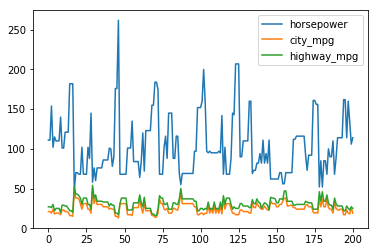

In [233]:
ds[['horsepower', 'city_mpg', 'highway_mpg']].plot()

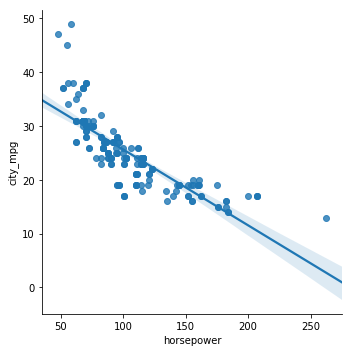

In [234]:
sns.lmplot('horsepower', 'city_mpg', ds)

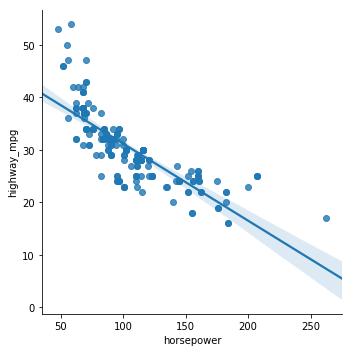

In [235]:
sns.lmplot('horsepower', 'highway_mpg', ds)

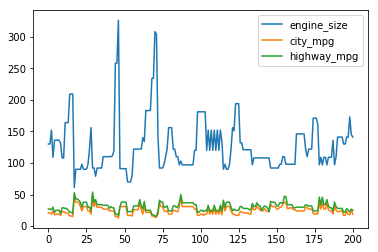

In [236]:
%matplotlib inline
ds[['engine_size', 'city_mpg', 'highway_mpg']].plot()

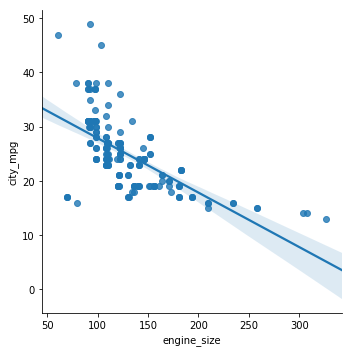

In [237]:
sns.lmplot('engine_size', 'city_mpg', ds)

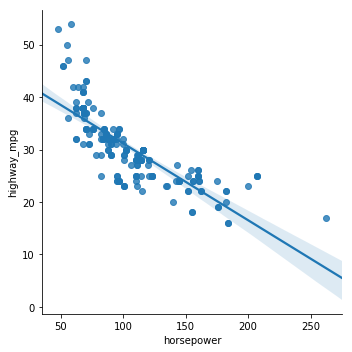

In [238]:
sns.lmplot('horsepower', 'highway_mpg', ds)

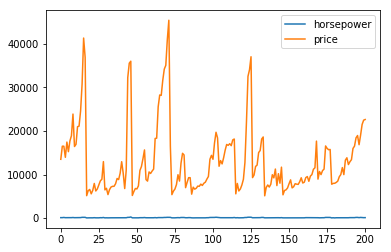

In [239]:
ds[['horsepower', 'price']].plot()

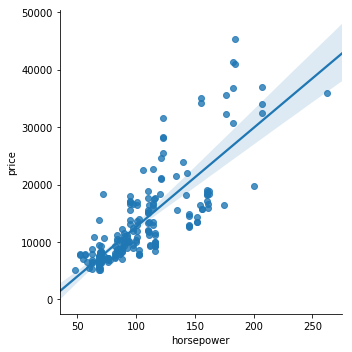

In [240]:
sns.lmplot('horsepower', 'price', ds)

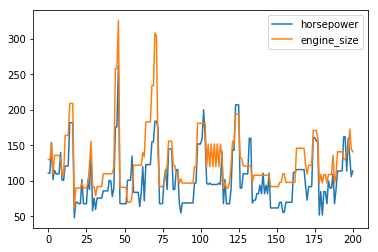

In [241]:
ds[['horsepower', 'engine_size']].plot()

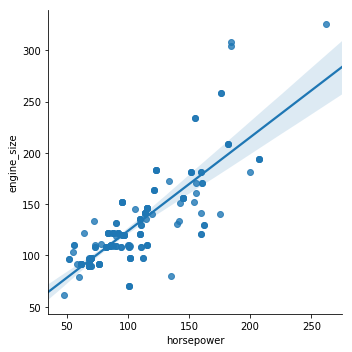

In [242]:
sns.lmplot('horsepower', 'engine_size', ds)

**Pergunta:**

Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**

Baseadas nas correlações e análises feitas, podemos perceber que: (1) o tamanho do motor influencia na força; (2) o tamanho do motor influencia no consumo, tanto na cidade quanto na estrada; e (3) a força influencia, também, no consumo de combustível, tanto na cidade quanto na estrada. Essas hipóteses foram levantadas prelinarmente e foram corroboradas a partir das análises feitas.

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

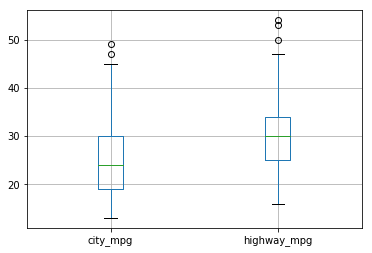

In [243]:
ds.boxplot(['city_mpg', 'highway_mpg'])

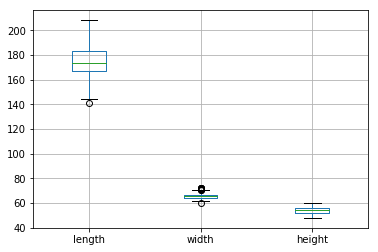

In [244]:
ds.boxplot(['length', 'width', 'height'])

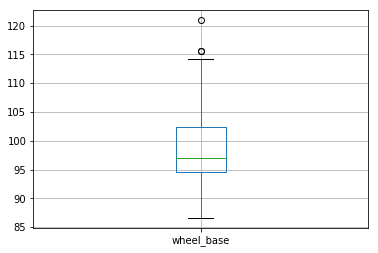

In [245]:
ds.boxplot(['wheel_base'])

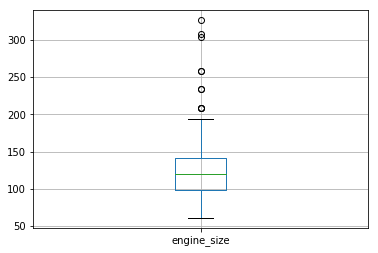

In [246]:
ds.boxplot(['engine_size'])

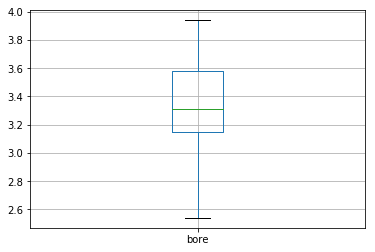

In [247]:
ds.boxplot(['bore'])

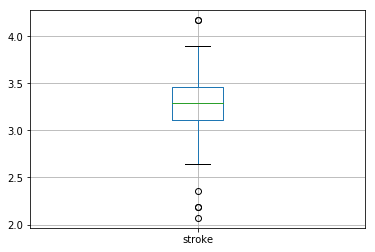

In [248]:
ds.boxplot(['stroke'])

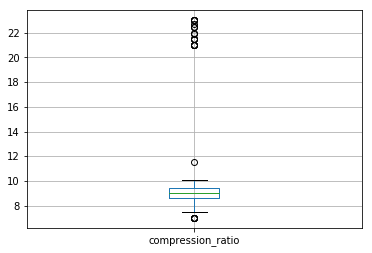

In [249]:
ds.boxplot(['compression_ratio'])

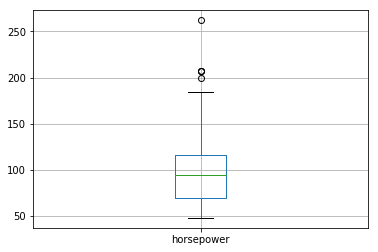

In [250]:
ds.boxplot(['horsepower'])

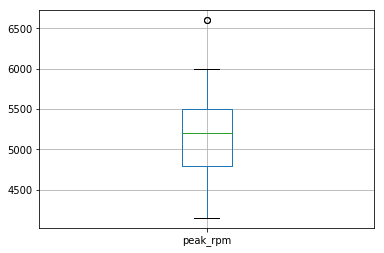

In [251]:
ds.boxplot(['peak_rpm'])

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [252]:
ds.isnull().any().any()

False

In [253]:
pd.isna(ds)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [254]:
ds.count()

symboling              201
normalized_losses      201
make                   201
fuel_type              201
aspiration             201
number_of_doors        201
body_style             201
drive_wheels           201
engine_location        201
wheel_base             201
length                 201
width                  201
height                 201
curb_weight            201
engine_type            201
number_of_cylinders    201
engine_size            201
fuel_system            201
bore                   201
stroke                 201
compression_ratio      201
horsepower             201
peak_rpm               201
city_mpg               201
highway_mpg            201
price                  201
dtype: int64

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

**Resposta:**

Considerando como valores nulos `NaN` e `None`, não foram encontrados valores nulos na base de dados, conforme está explicitado nas análises anteriormente apresentadas.

### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [255]:
def identificacao_zeros(df, column_name): 
    print(column_name)
    filtered = df.query('{0} == 0'.format(column_name))
    print(filtered)

for column in ['city_mpg', 'highway_mpg', 'length', 'width', 'height', 'wheel_base', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm']:
    identificacao_zeros(ds, column)


city_mpg
Empty DataFrame
Columns: [symboling, normalized_losses, make, fuel_type, aspiration, number_of_doors, body_style, drive_wheels, engine_location, wheel_base, length, width, height, curb_weight, engine_type, number_of_cylinders, engine_size, fuel_system, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

[0 rows x 26 columns]
highway_mpg
Empty DataFrame
Columns: [symboling, normalized_losses, make, fuel_type, aspiration, number_of_doors, body_style, drive_wheels, engine_location, wheel_base, length, width, height, curb_weight, engine_type, number_of_cylinders, engine_size, fuel_system, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

[0 rows x 26 columns]
length
Empty DataFrame
Columns: [symboling, normalized_losses, make, fuel_type, aspiration, number_of_doors, body_style, drive_wheels, engine_location, wheel_base, length, width, height, curb_weight, engine_type, number_of_cylinders, eng

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

**Resposta:**

Após análise das colunas de interesse na base de dados, não foram encontradas linhas com valores `zero`. Portanto, não foi realizada nenhuma imputação de dados neste contexto.

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [256]:
def identificacao_outlier(df, column_name): 
    print(column_name)
    first_quartile = np.percentile(df[column_name], 25)
    third_quartile = np.percentile(df[column_name], 75)
    interquartile_range = third_quartile - first_quartile
    lower_fence = first_quartile - (interquartile_range * 1.5)
    upper_fence = third_quartile + (interquartile_range * 1.5)
    
    filtered = df.query('@lower_fence <= {0} <= @upper_fence'.format(column_name))
    outlier_upper = df.query('{0} > @upper_fence'.format(column_name))
    outlier_lower = df.query('{0} < @lower_fence'.format(column_name))
    
    print(outlier_upper + outlier_lower)
    return filtered

In [257]:
for column in ['city_mpg', 'highway_mpg', 'length', 'width', 'height', 'wheel_base', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm']:
    identificacao_outlier(ds, column)

city_mpg
    symboling  normalized_losses make fuel_type aspiration number_of_doors  \
17 NaN        NaN                 NaN  NaN       NaN        NaN              
29 NaN        NaN                 NaN  NaN       NaN        NaN              

   body_style drive_wheels engine_location  wheel_base  ...    engine_size  \
17  NaN        NaN          NaN            NaN          ...   NaN            
29  NaN        NaN          NaN            NaN          ...   NaN            

    fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
17  NaN         NaN   NaN     NaN               NaN        NaN       NaN        
29  NaN         NaN   NaN     NaN               NaN        NaN       NaN        

    highway_mpg  price  
17 NaN          NaN     
29 NaN          NaN     

[2 rows x 26 columns]
highway_mpg
    symboling  normalized_losses make fuel_type aspiration number_of_doors  \
17 NaN        NaN                 NaN  NaN       NaN        NaN              
29 NaN     

Empty DataFrame
Columns: [symboling, normalized_losses, make, fuel_type, aspiration, number_of_doors, body_style, drive_wheels, engine_location, wheel_base, length, width, height, curb_weight, engine_type, number_of_cylinders, engine_size, fuel_system, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

[0 rows x 26 columns]
stroke
     symboling  normalized_losses make fuel_type aspiration number_of_doors  \
44  NaN        NaN                 NaN  NaN       NaN        NaN              
45  NaN        NaN                 NaN  NaN       NaN        NaN              
108 NaN        NaN                 NaN  NaN       NaN        NaN              
110 NaN        NaN                 NaN  NaN       NaN        NaN              
130 NaN        NaN                 NaN  NaN       NaN        NaN              
134 NaN        NaN                 NaN  NaN       NaN        NaN              

    body_style drive_wheels engine_location  wheel_base  ...    engi

**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:**
Sim, foram encontrados dados discrepantes (*outliers*) a partir da metodologia sugerida. A remoção de *outliers* depende muito do que se pretende fazer com uma base de dados e com os algoritmos que serão utilizados. Por exemplo, num problema de agrupamento (*clustering*), dependendo do método utilizado, os dados discrepantes poderão influenciam nos resultados ou não: enquanto o algoritmo *k-means* é sensível à presença de *outliers* (portanto, influenciando na qualidade dos resultados), o algoritmo DBSCAN é menos suceptível à influência de pontos discrepantes na base de dados.

### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [258]:
def mapear_serie(serie):
    dict_gen = {}
    
    for i, serie in enumerate(set(serie)):
        dict_gen[serie] = i
        
    return dict_gen

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [259]:
for column in ['make', 'fuel_type', 'aspiration', 'engine_type', 'number_of_cylinders', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'fuel_system']:
    print(mapear_serie(ds[column].unique()))

{'subaru': 0, 'audi': 1, 'mercury': 2, 'chevrolet': 3, 'porsche': 4, 'saab': 5, 'dodge': 6, 'isuzu': 7, 'honda': 8, 'volkswagen': 9, 'mazda': 10, 'bmw': 11, 'mercedes-benz': 12, 'mitsubishi': 13, 'peugot': 14, 'jaguar': 15, 'renault': 16, 'alfa-romero': 17, 'nissan': 18, 'toyota': 19, 'volvo': 20, 'plymouth': 21}
{'gas': 1, 'diesel': 0}
{'std': 0, 'turbo': 1}
{'rotor': 0, 'dohc': 1, 'ohcf': 2, 'l': 3, 'ohc': 4, 'ohcv': 5}
{'twelve': 0, 'six': 1, 'three': 2, 'two': 3, 'four': 4, 'five': 5, 'eight': 6}
{'four': 0, 'two': 1}
{'sedan': 0, 'wagon': 1, 'convertible': 2, 'hardtop': 3, 'hatchback': 4}
{'fwd': 0, 'rwd': 1, '4wd': 2}
{'front': 0, 'rear': 1}
{'4bbl': 0, 'mpfi': 1, 'mfi': 2, 'spdi': 3, '2bbl': 4, 'idi': 5, 'spfi': 6, '1bbl': 7}


In [260]:
for column in ['make', 'fuel_type', 'aspiration', 'engine_type', 'number_of_cylinders', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'fuel_system']:
    ds[column] = ds[column].replace(mapear_serie(ds[column].unique()))

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diesel", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [261]:
ds['make'].head(20)

0     17
1     17
2     17
3     1 
4     1 
5     1 
6     1 
7     1 
8     1 
9     11
10    11
11    11
12    11
13    11
14    11
15    11
16    11
17    3 
18    3 
19    3 
Name: make, dtype: int64

## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**

- A Regressão Linear é um método estatístico para construir uma função linear que melhor represente os pontos de uma coleção de dados. Geralmente, utiliza-se regressão linear quando podemos utilizar uma ou mais variáveis para predizer uma outra variável;
- A Regressão de Árvore de Decisão utiliza o método de árvore de decisão para tentar prever uma variável a partir de características em outras variáveis. A árvore de decisão é construída estabelecendo-se regras de decisão a partir das características de uma ou mais variáveis. Este método de regressão é utilizado, por exemplo, quando temos variáveis paramétricas no conjunto de dados que não facilmente mapeamadas para dados numéricos (a extração de *features* nem sempre é simples); e
- A Regressão Ridge, por fim, trabalha, assim como a regressão linear, na construção de uma função que possa representar os pontos da base de dados utilizando penalidades. Este método é mais robusto e menos sensível a *outliers*.

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

In [262]:
predictive_attributes = ['fuel_type', 'body_style', 'aspiration', 'number_of_doors', 'fuel_system', 'peak_rpm', 'horsepower', 'engine_size']
target_attribute = ['price']

Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [263]:
from sklearn.model_selection import train_test_split

X = ds[predictive_attributes]
y = ds[target_attribute]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [264]:
X_train.head(10)

,fuel_type,body_style,aspiration,number_of_doors,fuel_system,peak_rpm,horsepower,engine_size
190,1,0,0,0,1,5400,114,141
90,1,1,0,0,4,5200,69,97
136,1,4,0,1,4,4400,73,108
51,1,0,0,0,4,5000,68,91
127,1,4,0,1,1,5500,90,132
162,1,4,0,1,1,6600,112,98
41,1,0,0,1,4,5500,100,110
118,1,0,0,0,4,5500,68,90
113,0,0,1,0,5,4150,95,152
26,1,0,1,1,1,5500,102,98


In [265]:
y_train.head(10)

,price
190,12940
90,7349
136,7603
51,7395
127,9895
162,9538
41,10345
118,6692
113,17950
26,8558


In [266]:
X_test.head(10)

,fuel_type,body_style,aspiration,number_of_doors,fuel_system,peak_rpm,horsepower,engine_size
95,1,3,0,1,4,5200,69,97
15,1,0,0,1,1,5400,182,209
30,1,4,0,1,7,6000,76,92
158,1,0,0,0,4,4800,70,98
128,1,4,0,1,1,5250,110,121
115,1,4,0,1,4,5500,68,90
69,1,2,0,1,1,4750,155,234
171,1,4,0,0,1,4200,92,122
175,1,4,0,1,1,5200,161,171
45,1,0,0,0,1,4750,176,258


In [267]:
y_test.head(10)

,price
95,8249
15,41315
30,6855
158,9258
128,11850
115,5572
69,35056
171,9988
175,15998
45,35550


Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [268]:
print('Train percentage for X: {0}'.format(len(X_train) / float(len(X)) * 100))
print('Test percentage for X: {0}'.format(len(X_test) / float(len(X)) * 100))
print('Train percentage for y: {0}'.format(len(y_train) / float(len(y)) * 100))
print('Test percentage for y: {0}'.format(len(y_test) / float(len(y)) * 100))

Train percentage for X: 66.6666666667
Test percentage for X: 33.3333333333
Train percentage for y: 66.6666666667
Test percentage for y: 33.3333333333


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [269]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [270]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [271]:
pontuacao(lr_model, X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) R2 score: 0.78


### Regressão de árvore de Decisão

In [272]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [273]:
pontuacao(dtr_model, X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 0.88


### Regressão Ridge

In [274]:
lrr_model = linear_model.Ridge()
lrr_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [275]:
pontuacao(dtr_model, X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 0.88


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** Ambos os algoritmos de Regressão Ridge e Regressão por Árvore de Decisão apresentaram bons resultados (com acurácia de 87% cada). Já o algoritmo de Regressão Linear obteve uma acurácia menor, de 78%. Dadas as características dos algoritmos, o algoritmo de Regressão Linear performou pior em relação às outras estratégias pois trabalha a partir de uma análise mais linear/contínua do espaço de busca, tentando construir uma função que possa definir a predição. A árvore de decisão, por outro lado, trabalha a partir de uma construção discreta da predição, construindo regras de decisão a partir das características dos dados.

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [276]:
from sklearn.model_selection import GridSearchCV
        
parameters = {}
opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino.

In [277]:
opt_model_lr.score(X_train, y_train.values.ravel()), opt_model_lr.best_estimator_

(0.8197206445679494,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

E também para os dados de testes.

In [278]:
opt_model_lr.score(X_test, y_test.values.ravel()), opt_model_lr.best_estimator_

(0.7805084537934132,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [279]:
parameters = {}
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [280]:
opt_model_dtr.score(X_train, y_train.values.ravel()), opt_model_dtr.best_estimator_

(0.991089796353323,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))

Pontuação dos dados de teste.

In [281]:
opt_model_dtr.score(X_test, y_test.values.ravel()), opt_model_dtr.best_estimator_

(0.8666254792247251,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))

### Regulação do Modelo de Regressão Ridge

In [282]:
parameters = {}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [283]:
opt_model_lrr.score(X_train, y_train.values.ravel()), opt_model_lrr.best_estimator_

(0.8195485101634529,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001))

Pontuação dos dados de teste.

In [284]:
opt_model_lrr.score(X_test, y_test.values.ravel()), opt_model_dtr.best_estimator_

(0.7787241381386238,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

| R2 kind             | Regressão linear | Regressão árvore de decisão | Regressão ridge  |
|:--------------------|:---------------- |:--------------------------- |:---------------- |
| R2 treino           | 81%              | 99%                         | 81%              |
| R2 teste            | 78%              | 87%                         | 77%              |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** O melhor algoritmo de regressão para o caso analisado foi o algoritmo de regressão baseada em árvore de decisão. Como descrito anteriormente, o algoritmo cria uma árvore de decisão baseada em características nas variáveis/*features* dos pontos de dados. Acreditamos que, dada essa natureza específica da base de dados, o algoritmo de regressão baseada em árvore de decisão obteve uma melhor acurácia.

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [285]:
optmized_model = tree.DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
optmized_model.fit(X_train, y_train)
pontuacao(optmized_model, X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 0.86


### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [322]:
#Lembre-se que os atributos são os armazenados na lista predictive_attributes

predictive_attributes

['fuel_type',
 'body_style',
 'aspiration',
 'number_of_doors',
 'fuel_system',
 'peak_rpm',
 'horsepower',
 'engine_size']

In [326]:
test_example_1_dict = {
    'engine_size': 304,
    'body_style': 3,
    'number_of_doors': 1,
    'fuel_type': 1,
    'fuel_system': 1,
    'peak_rpm': 4500,
    'horsepower': 184,
    'aspiration': 0
}
test_example_1 = [test_example_1_dict.values()]
print(optmized_model.predict(test_example_1))

test_example_2_dict = {
    'engine_size': 61,
    'body_style': 3,
    'number_of_doors': 2,
    'fuel_type': 1,
    'fuel_system': 2,
    'peak_rpm': 2500,
    'horsepower': 48,
    'aspiration': 1
}
test_example_2 = [test_example_2_dict.values()]
print(optmized_model.predict(test_example_2))

test_example_3_dict = {
    'engine_size': 73,
    'body_style': 2,
    'number_of_doors': 2,
    'fuel_type': 0,
    'fuel_system': 2,
    'peak_rpm': 2500,
    'horsepower': 73,
    'aspiration': 1
}
test_example_3 = [test_example_3_dict.values()]
print(optmized_model.predict(test_example_3))


[13845.]
[13845.]
[13845.]


## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:** O modelo otimizado apresentou *overfitting* para a regressão dos exemplos colocados no código final deste *Notebook*. Tentar obter uma melhor análise dos dados, dos atributos escolhidos para a regressão e otimizar a levando em consideração estas características poderão melhorar e evitar este *overfitting*.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**:
Os algoritmos de regressão analisados lidam bem com dados numéricos/reais (variáveis/características contínuas). Em geral, bases de dados que apresentam tal característica nos dados, e estes dados aprensentam uma base de dados para aprendizado (já que se tratam de soluções baseadas em aprendizado supervisionado), algoritmos de regressão serão bem utilizados. Regressão é geralmente utilizada para tentar classificar uma entrada na base de dados com base num aprendizado anteriormente realizado.

Exemplos de aplicação são: análise de ativos de renda variável; análise e classificação da precificação de imóveis em uma determinada região; etc.